- cat vs cat
  - pd.crosstab() ***
- num vs num
  - scatter (plt)

- Pearson correlation coefficient
  - heatmap()

- heatmap
  - visa_df.corr(numeric_only=True)
  - sns.heatmap(visa_df.corr(numeric_only=True),annot=True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df=pd.read_csv(r"C:\Users\Rajasri\Documents\DATA SCIENCE Naresh IT\Data files\Visadataset - Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- bivariate analysis:
analysis two variables
two categorical or numerical,
1 cat and 1 num

In [34]:
cat=visa_df.select_dtypes(include="object").columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [35]:
num=visa_df.select_dtypes(exclude="object").columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

## cat vs cat

- continent and case_status

In [36]:
visa_df["continent"].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [37]:
visa_df["case_status"].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- how many asia people are certified

In [38]:
con1=visa_df["continent"]=="Asia"
con1

0         True
1         True
2         True
3         True
4        False
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: continent, Length: 25480, dtype: bool

In [39]:
con2=visa_df["case_status"]=="Certified"
con2

0        False
1         True
2        False
3        False
4         True
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: case_status, Length: 25480, dtype: bool

In [40]:
visa_df[con1 & con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [41]:
con1=visa_df["continent"]=="Asia"
con2=visa_df["case_status"]=="Denied"
visa_df[con1 & con2]
print(f"Visa denied employees: {len(visa_df[con1 & con2])}")

Visa denied employees: 5849


In [42]:
con1 & con2

0         True
1        False
2         True
3         True
4        False
         ...  
25475    False
25476    False
25477    False
25478    False
25479    False
Length: 25480, dtype: bool

In [43]:
for i in visa_df["continent"].unique():
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Denied"
    con3=visa_df["case_status"]=="Certified"
    print(f"Visa certified employees of {i}: {len(visa_df[con1 & con3])}")
    print(f"Visa denied employees of {i}: {len(visa_df[con1 & con2])}")

Visa certified employees of Asia: 11012
Visa denied employees of Asia: 5849
Visa certified employees of Africa: 397
Visa denied employees of Africa: 154
Visa certified employees of North America: 2037
Visa denied employees of North America: 1255
Visa certified employees of Europe: 2957
Visa denied employees of Europe: 775
Visa certified employees of South America: 493
Visa denied employees of South America: 359
Visa certified employees of Oceania: 122
Visa denied employees of Oceania: 70


In [44]:
cert=[]
den=[]
for i in visa_df["continent"].unique():
    con1=visa_df["continent"]==i
    con2=visa_df["case_status"]=="Denied"
    con3=visa_df["case_status"]=="Certified"
    certified=len(visa_df[con1&con3])
    cert.append(certified)
    denied=len(visa_df[con1&con2])
    den.append(denied)

pd.DataFrame({"Certified":cert,"Denied":den},index=visa_df["continent"].unique())

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


### pd.crosstab()

In [45]:
col1=visa_df["continent"]
col2=visa_df["case_status"]
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [46]:
col1=visa_df["continent"]
col2=visa_df["case_status"]
r2=pd.crosstab(col2,col1)
r2

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


<Axes: xlabel='case_status'>

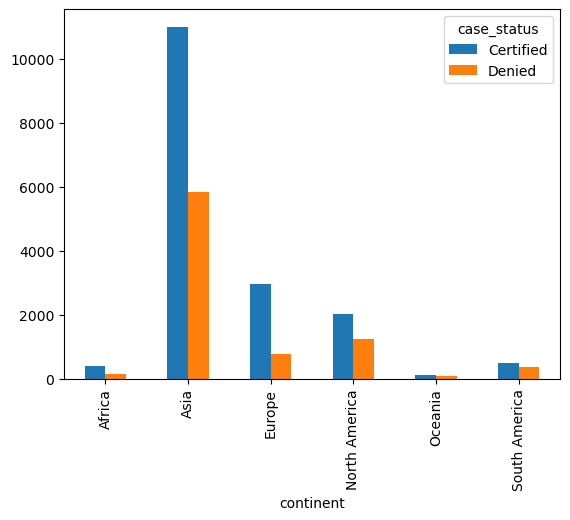

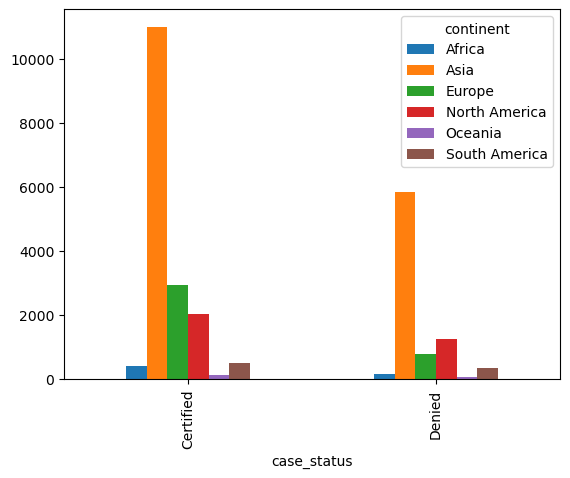

In [47]:
r1.plot(kind="bar")
r2.plot(kind="bar")

- 3 columns

In [48]:
col1=visa_df["continent"]
col3=visa_df["case_status"]
col2=visa_df["education_of_employee"]
col=[col1,col2]
r3=pd.crosstab(col,col3)
r3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent,education_of_employee'>

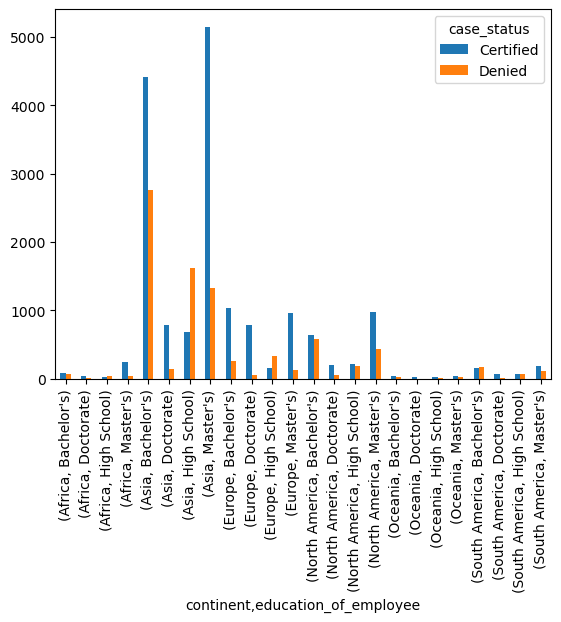

In [49]:
r3.plot(kind="bar")

In [50]:
col1=visa_df["continent"]
col3=visa_df["case_status"]
col2=visa_df["education_of_employee"]
col=[col1,col2]
r4=pd.crosstab(col3,col)
r4

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

<Axes: xlabel='case_status'>

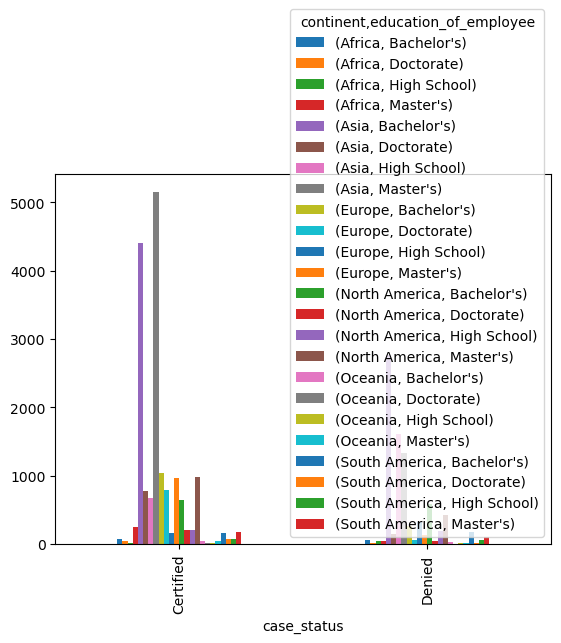

In [51]:
r4.plot(kind="bar")

## num vs num

- use scatter plot
- it is under matplotlib

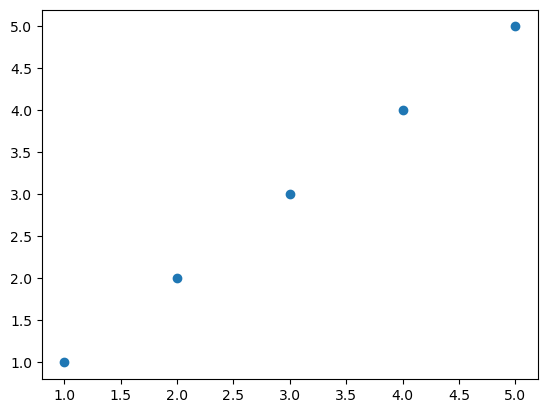

In [52]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)

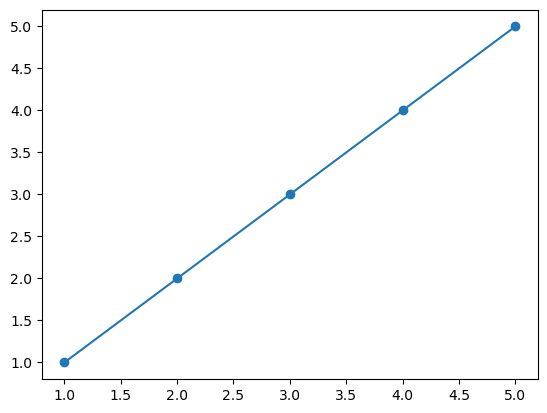

In [53]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

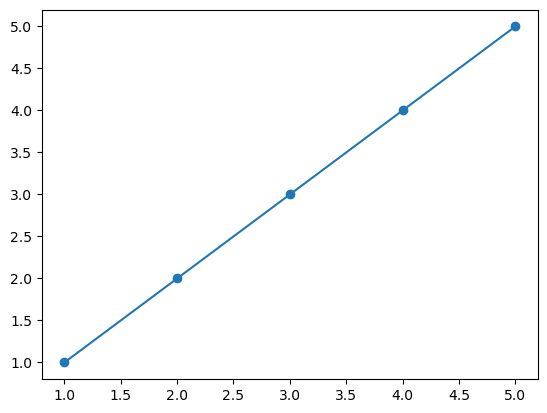

In [54]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

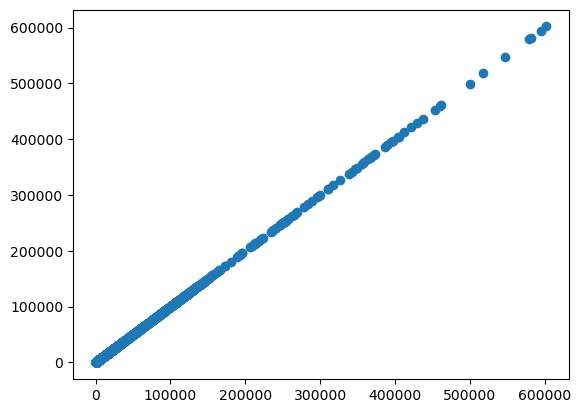

In [56]:
x=visa_df["no_of_employees"].values
y=visa_df["yr_of_estab"].values
plt.scatter(x,x)
plt.show()

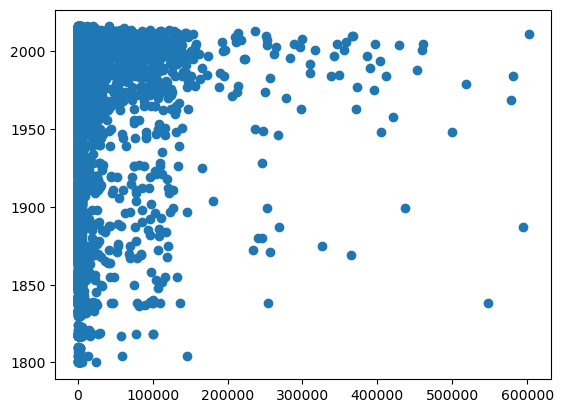

In [57]:
x=visa_df["no_of_employees"].values
y=visa_df["yr_of_estab"].values
plt.scatter(x,y)
plt.show()

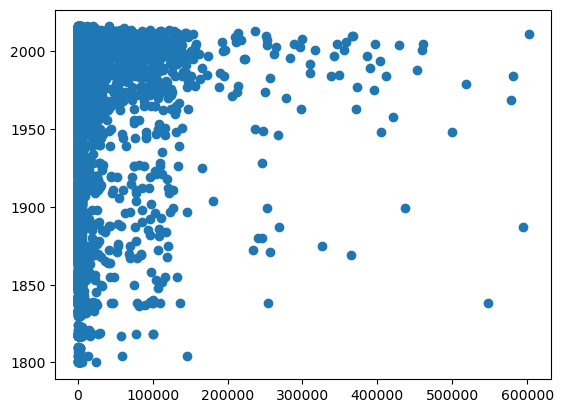

In [58]:
x=visa_df["no_of_employees"]
y=visa_df["yr_of_estab"]
plt.scatter(x,y)
plt.show()

- obs:no relation

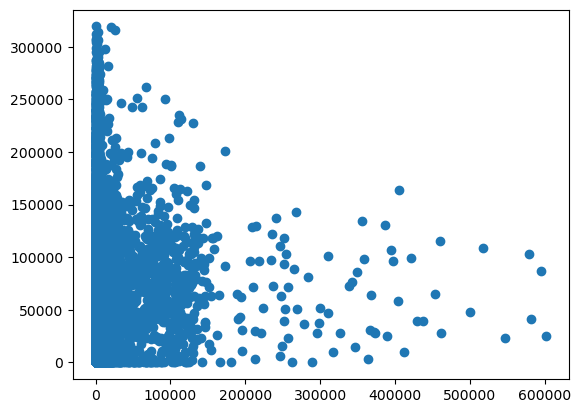

In [59]:
x=visa_df["no_of_employees"].values
y=visa_df["prevailing_wage"].values
plt.scatter(x,y)
plt.show()

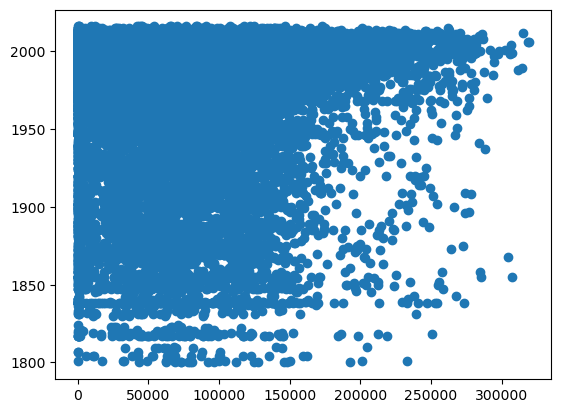

In [60]:
x=visa_df["yr_of_estab"].values
y=visa_df["prevailing_wage"].values
plt.scatter(y,x)
plt.show()

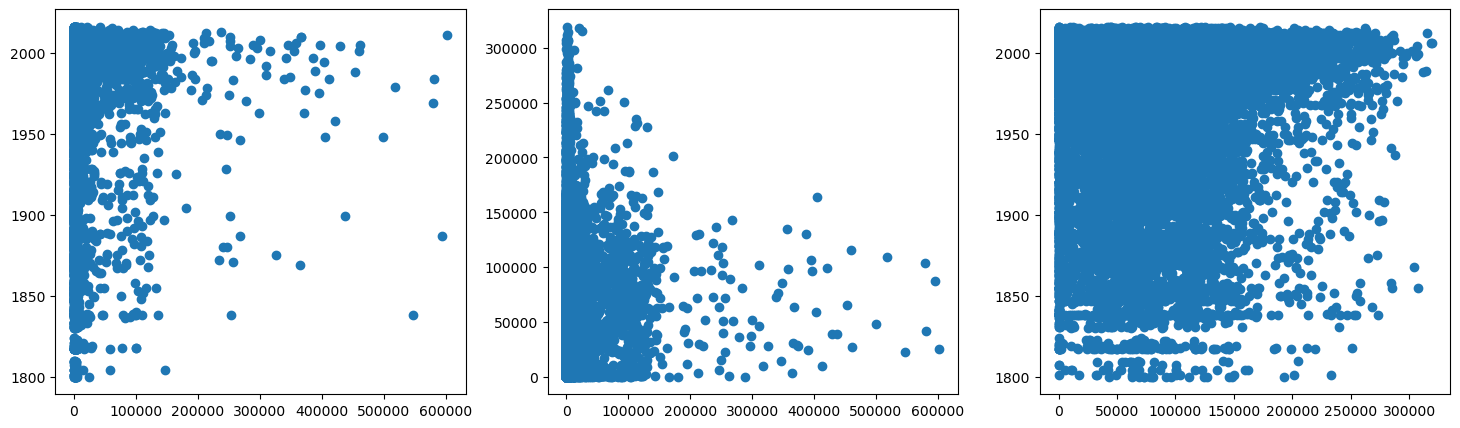

In [61]:
plt.figure(figsize=(18,5))
x=visa_df["no_of_employees"].values
y=visa_df["yr_of_estab"].values
plt.subplot(1,3,1).scatter(x,y)

x=visa_df["no_of_employees"].values
y=visa_df["prevailing_wage"].values
plt.subplot(1,3,2).scatter(x,y)

x=visa_df["prevailing_wage"].values
y=visa_df["yr_of_estab"].values
plt.subplot(1,3,3).scatter(x,y)
plt.show()

- no relation

- so use pearson coefficient to find steangth of relation

## pearson correlation coefficient

- corr function under pandas
  - it gives covariance matrix
  - we have 3 cols so 3x3 matrix
  - upper and lower triangle gives covariance
  - diagonal var

In [4]:
visa_df.corr()

ValueError: could not convert string to float: 'EZYV01'

In [5]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


<Axes: >

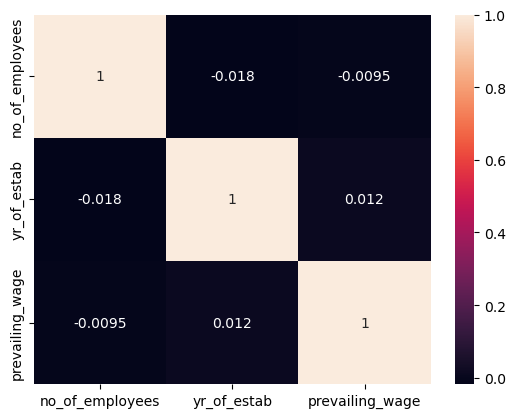

In [64]:
sns.heatmap(visa_df.corr(numeric_only=True),annot=True)

- the correlation bet no_of_employees and yr_of_estab is 0
- indicated no relation

### what happen if correlation is high

In [7]:
wine_df=pd.read_csv(r"C:\Users\Rajasri\Documents\DATA SCIENCE Naresh IT\Data files\winequality_red - winequality_red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
winee_df=wine_df.drop_duplicates()

In [9]:
winee_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [10]:
winered_df=winee_df.iloc[1:,:]
winered_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [11]:
winered_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
len(winered_df.columns)

12

In [13]:
len(winered_df.select_dtypes(exclude=object).columns)

12

In [14]:
winered_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [15]:
winered_df.corr().max()

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
quality                 1.0
dtype: float64

### identify max val

- heatmap (sns)
  - represent matrix representation of correlation value
  - diff value diff color
  - beside matrix, display color bar
  - color bar : scale of values with color

<Axes: >

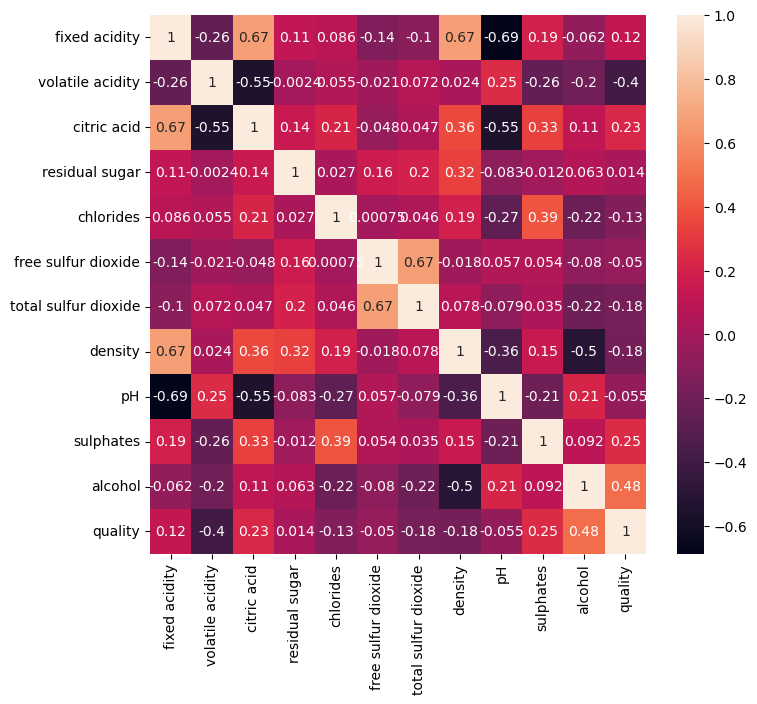

In [16]:
plt.figure(figsize=(8,7))
wine_corr=winered_df.corr()
sns.heatmap(wine_corr,annot=True)

<Axes: >

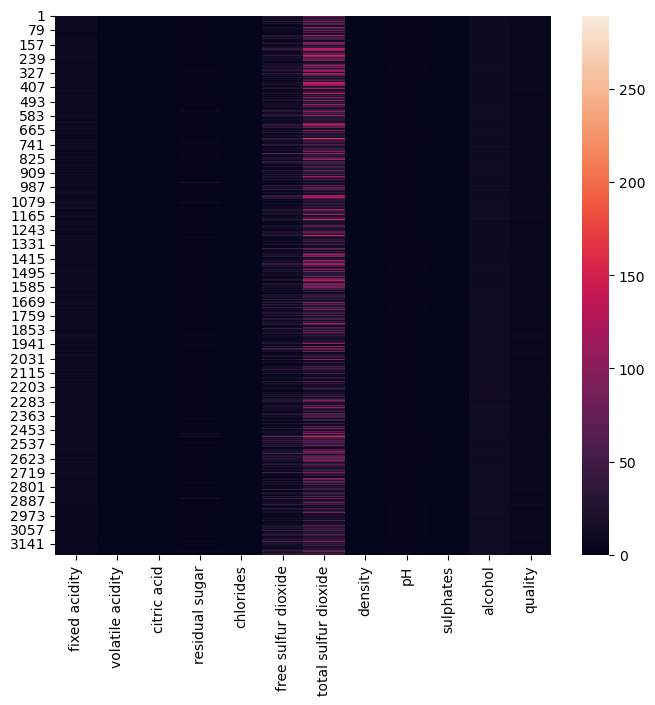

In [17]:
plt.figure(figsize=(8,7))
# wine_corr=winered_df.corr()
sns.heatmap(winered_df)

In [18]:
wine_corr=winered_df.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [19]:
sns.__version__

'0.13.2'

- values are not coming, so upgrade

Text(0, 0.5, 'pH')

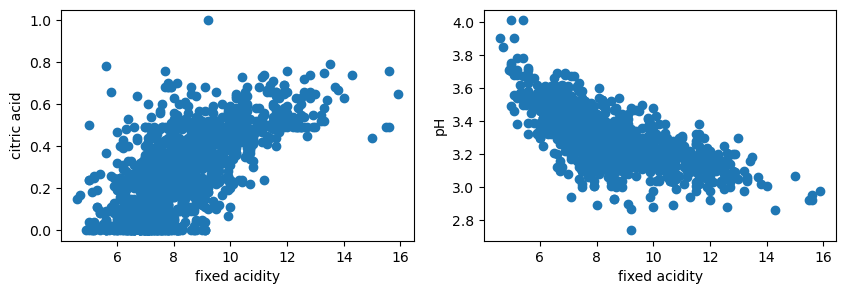

In [20]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1).scatter(winered_df["fixed acidity"],winered_df["citric acid"])
plt.xlabel("fixed acidity")
plt.ylabel("citric acid")
plt.subplot(1,2,2).scatter(winered_df["fixed acidity"],winered_df["pH"])
plt.xlabel("fixed acidity")
plt.ylabel("pH")

- positive and negative relation

Text(0, 0.5, 'pH')

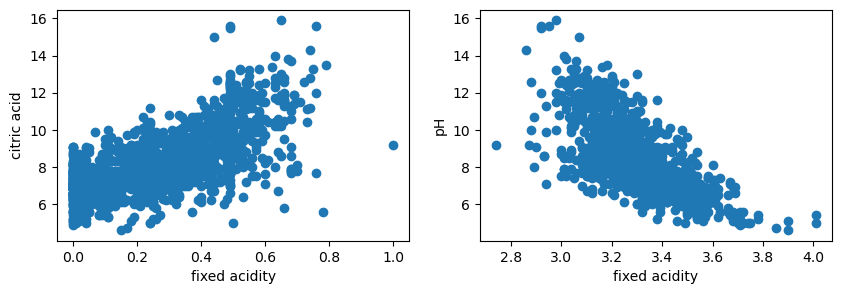

In [22]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1).scatter(winered_df["citric acid"],winered_df["fixed acidity"])
plt.xlabel("fixed acidity")
plt.ylabel("citric acid")
plt.subplot(1,2,2).scatter(winered_df["pH"],winered_df["fixed acidity"])
plt.xlabel("fixed acidity")
plt.ylabel("pH")